<a href="https://colab.research.google.com/github/rodmsmendes/reinforcementlearning4fun/blob/master/Linear_Regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with one variable

In this example, we use Linear Regression as an exploratory data analysis tool. The objective is to understand how well can we explain the SalePrice of a house using real attributes individually. 

Github version:
https://github.com/rodmsmendes/reinforcementlearning4fun/blob/master/Linear_Regression_with_one_variable.ipynb

Kaggle kernel version:
https://www.kaggle.com/rodolfomendes/linear-regression-with-one-variable/notebook

## 1. Importing libraries

For this notebook we load some of the most common libraries for Data Science wiht Python:
* NumPy
* Pandas
* Matplotlib
* scikit-learn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Loading Data and Selecting Attributes

Then we use Pandas to load data from house pricing competition, into a DataFrame.





In [0]:
url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
df = pd.read_csv(url)

For this litte example, we select only the attributes which represents measurements. So, for our new DataFrame we select only the attributes of the **float64** type. Next with print information about the attributes as well their basic statistics. 

In [0]:
df_float = df.select_dtypes(include=['float64']).copy()
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1201 non-null float64
MasVnrArea     1452 non-null float64
GarageYrBlt    1379 non-null float64
dtypes: float64(3)
memory usage: 34.3 KB


In [0]:
df_float.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


## 3. Filling missing values

From the DataFrame information printed above, we can observe the DataFrame has a total of 1460 rows. But looking at the attributes we observe that all of them
has less than 1460 non-null values each. So we need to handle this missing values in order to proceed. So, for each attribute we use the method *fillna()*
to fill the missing values with the their respective mean value.

In [0]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)

In [0]:
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)

In [0]:
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

After filling the missing values we can check that each attribute has 1460 non-null values each:

In [0]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1460 non-null float64
MasVnrArea     1460 non-null float64
GarageYrBlt    1460 non-null float64
dtypes: float64(3)
memory usage: 34.3 KB


## 4. Regression Analysis for LotFrontage

Once we handled the missing values for each attribute, we can proceed to the linear regression analysis. In this example we build a linear regression model to explain the SalePrice of a house depending on the LotFrontage measurement. As a first step we save the respective attributes into variables *lotFrontage* and *salePrice*. Instead of the traditional *X* e *y* variables we use the attribute name for clarity purposes.

In [0]:
lotFrontage = df_float[['LotFrontage']]
salePrice = df['SalePrice']

Next we create an instance of *LinearRegression* class from scikit-learn and call the method *fit()* passing the columns as parameters to create our model. 

In [0]:
lr1 = LinearRegression()
lr1.fit(lotFrontage, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We our model created, print the model coeficient, intercept and measure the mean squared error of the model.

In [0]:
print(lr1.coef_)
print(lr1.intercept_)
print(mean_squared_error(salePrice, lr1.predict(lotFrontage)))

[1208.0155492]
96299.75696070473
5599428130.969559


## 5. Regression Analysis for MasVnrAre

We the repeat the same steps of section 4 for the MasVnrAre attribute.

In [0]:
masVnrAre = df_float[['MasVnrArea']]
salePrice = df['SalePrice']

In [0]:
lr2 = LinearRegression()
lr2.fit(masVnrAre, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lr2.coef_)
print(lr2.intercept_)
print(mean_squared_error(salePrice, lr2.predict(masVnrAre)))

[209.08536998]
159242.12458511663
4882373206.33175


## 6. Regression Analysis for GarageYrBlt

We the repeat the same steps of section 4 for the GarageYrBlt attribute.

In [0]:
garageYrBlt = df_float[['GarageYrBlt']]
salePrice = df['SalePrice']

In [0]:
lr3 = LinearRegression()
lr3.fit(garageYrBlt, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lr3.coef_)
print(lr3.intercept_)
print(mean_squared_error(salePrice, lr3.predict(garageYrBlt)))

[1556.68774577]
-2898995.104363801
4912566774.814545


## 7. Results

The results of ou regression analysis are presented in the charts below. For each analysed atrribute we use a scatter plot to represent the data points (in blue) userd for the analysis. Then we use the predicted values (the output of the model) to plot a line representing the linear model (in orange).

<Figure size 432x288 with 0 Axes>

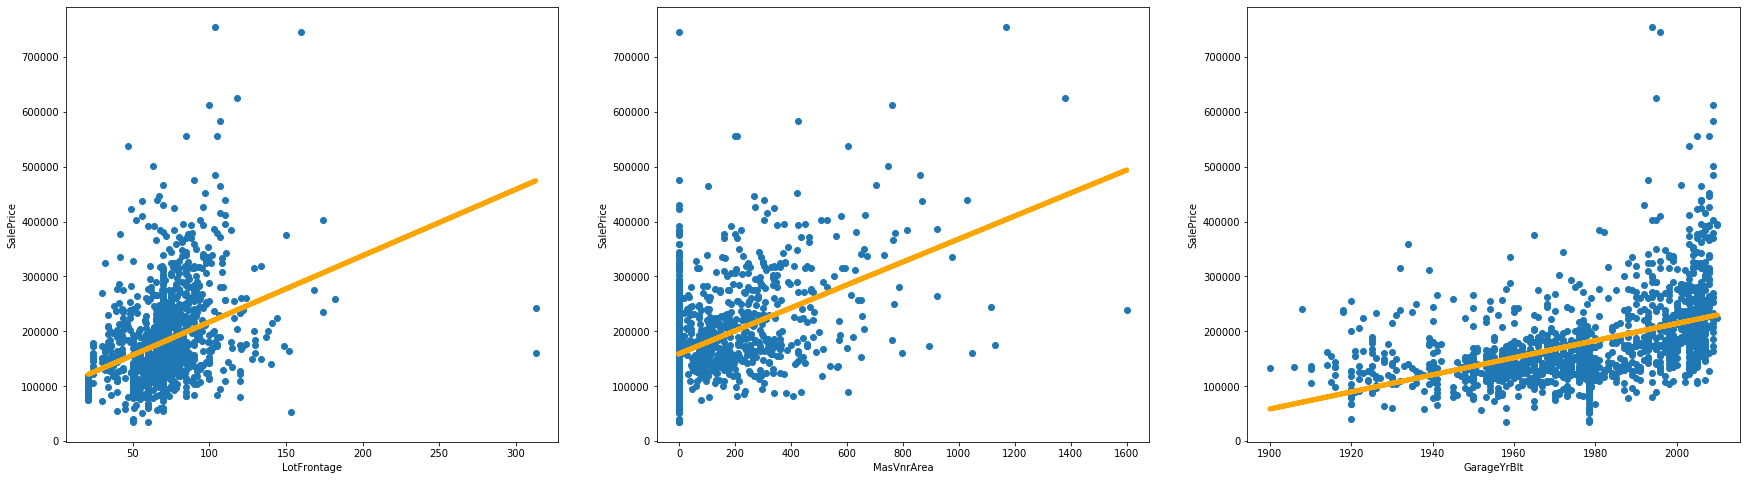

In [0]:
f = plt.figure()
f, ax = plt.subplots(1, 3, figsize=(30, 8))

ax = plt.subplot(1, 3, 1)
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
ax = plt.scatter(lotFrontage, salePrice)
ax = plt.plot(lotFrontage, lr1.predict(lotFrontage), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 2)
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
ax = plt.scatter(masVnrAre, salePrice)
ax = plt.plot(masVnrAre, lr2.predict(masVnrAre), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 3)
plt.ylabel('SalePrice')
plt.xlabel('GarageYrBlt')
ax = plt.scatter(garageYrBlt, salePrice)
ax = plt.plot(garageYrBlt, lr3.predict(garageYrBlt), linewidth=5.0, color='orange')

ax = plt.show()

Finally, we use a bar chart to compare the mean squared error of each model.

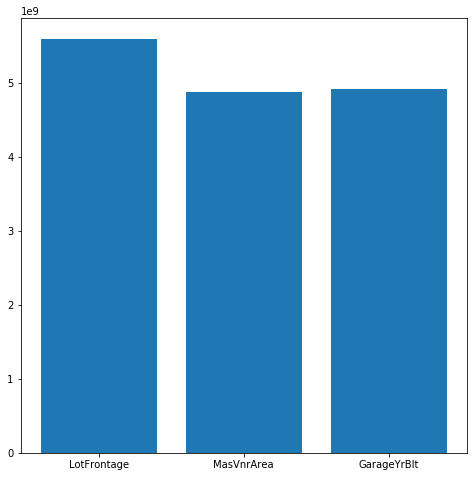

In [0]:
names = ['LotFrontage', 'MasVnrArea',	'GarageYrBlt']
heights = [
           mean_squared_error(salePrice, lr1.predict(lotFrontage)),
           mean_squared_error(salePrice, lr2.predict(masVnrAre)),
           mean_squared_error(salePrice, lr3.predict(garageYrBlt))]

f = plt.figure(figsize=(8,8))
ax = plt.bar(names, heights)

## 8. Conclusion

In this example, we used the Linear Regression as a exploratory data analysis tool. Usign the scikit-learn libray we create Linear Regression models to understand if the target attribute *SalePrice* can be explained in terms of *LotFrontage*, *MasVnrArea* or *GarageYrBlt* individually.

Finally, the results of modeling are presented by printing the coeficients and intercepts of the models as well as ploting them together with the data points.
